# Deep leanring project

## 1 Data loading and argumenting

In [1]:
##### before running it, make sure you don't have lots of big files in your google drive
##### otherwise it's going to take too long to finish running it before giving the TIMEOUT error
##### also save the train_controls, train_patients, val_controls, val_patients to your drive and
##### create a "train" folder with train_controls, train_patients in it, and 
##### a "val" folder with val_controls, val_patients in it.
##### change the train_dir and val_dir in the next cell to the dir of your train and val folder

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


## 1.1 Seeds and predefined stuffs

In [0]:
from numpy.random import seed
seed(137)
from tensorflow import set_random_seed
set_random_seed(191)

# Dir (Comment out others when you run the code)
# e.g. /gdrive/My Drive/deep_learning/new_dataset/test/controls/View2098.jpg
#          |                                             |

# Kavi's

# Daniel's

# Chelsea's 
train_dir = "/gdrive/My Drive/deep_learning/new_dataset/train"
val_dir = "/gdrive/My Drive/deep_learning/new_dataset/val"
test_dir = "/gdrive/My Drive/deep_learning/new_dataset/test"


img_width = 600
img_height = 450
batch_size = 5
channels = 3
nb_train_samples = 287
nb_validation_samples = 93

## 1.2 Data loading

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)             
val_datagen = ImageDataGenerator(rescale=1./255)              

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle = True,
        class_mode='binary')   

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle = True,
    class_mode='binary') #weight toward one class or another

#Keras takes care of generating labels if the directory structure matches above!
label_mapT = train_generator.class_indices
print(label_mapT)

label_mapV = validation_generator.class_indices
print(label_mapV)

for data_batch, labels_batch in train_generator:
    print ('data batch shape:', data_batch.shape)
    #print(data_batch)
    print('labels batch shape:', labels_batch.shape)
    #print(labels_batch)
    break

Found 410 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
{'controls': 0, 'patients': 1}
{'controls': 0, 'patients': 1}
data batch shape: (5, 450, 600, 3)
labels batch shape: (5,)


## 2 Model training

## 2.1 Global average pooling layer

In [0]:
from keras import backend as K

def globalaverage(x):
  return K.mean(x, axis=(1,2), keepdims=False)

#Samples, h, w, channel
def output_of_lambda(input_shape):
    return (input_shape[0], 1, 1, input_shape[-1])


In [0]:
import numpy as np 
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Model, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Softmax, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D
from keras.layers import Lambda
from keras.metrics import categorical_accuracy
from keras import regularizers
import tensorflow as tf
from keras.models import Sequential

from keras.callbacks import TensorBoard

#from keras.layers import Input, Dense
from keras.models import Model

input_shape = (img_height, img_width, channels)

model = Sequential()

model.add(Conv2D(32,(11, 11), input_shape=input_shape))#, kernel_regularizer=regularizers.l1(0.01))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32,(3, 3), input_shape=input_shape))#, kernel_regularizer=regularizers.l1(0.01))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32,(3, 3), input_shape=input_shape))#, kernel_regularizer=regularizers.l1(0.01))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# model.add(Conv2D(32,(5, 5), input_shape=input_shape)) #, 
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

# model.add(Conv2D(32,(7, 7), input_shape=input_shape, kernel_regularizer=regularizers.l2(0.01)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

# model.add(Conv2D(32,(3, 3), input_shape=input_shape))#, kernel_regularizer=regularizers.l1(0.01)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

# model.add(Conv2D(32,(3, 3), input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

# model.add(Conv2D(64,(3, 3), input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())


# model.add(GlobalAveragePooling2D())

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5)) 
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 440, 590, 32)      11648     
_________________________________________________________________
activation_11 (Activation)   (None, 440, 590, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 220, 295, 32)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 220, 295, 32)      128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 218, 293, 32)      9248      
_________________________________________________________________
activation_12 (Activation)   (None, 218, 293, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 109, 146, 32)      0         
__________

In [14]:
from keras import optimizers

epochs = 50

opt = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.1)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    shuffle=True)

Epoch 1/50
57/57 [==============================] - 10s 179ms/step - loss: 3.6397 - acc: 0.7614 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 2/50
57/57 [==============================] - 9s 154ms/step - loss: 3.4332 - acc: 0.7789 - val_loss: 1.9680 - val_acc: 0.8778
Epoch 3/50
57/57 [==============================] - 9s 155ms/step - loss: 3.0748 - acc: 0.8000 - val_loss: 2.1452 - val_acc: 0.8667
Epoch 4/50
57/57 [==============================] - 9s 155ms/step - loss: 2.7835 - acc: 0.8211 - val_loss: 2.2865 - val_acc: 0.8556
Epoch 5/50
57/57 [==============================] - 9s 155ms/step - loss: 2.8060 - acc: 0.8140 - val_loss: 1.5731 - val_acc: 0.8889
Epoch 6/50
57/57 [==============================] - 9s 154ms/step - loss: 2.2914 - acc: 0.8351 - val_loss: 2.1471 - val_acc: 0.8667
Epoch 7/50
57/57 [==============================] - 9s 155ms/step - loss: 2.3408 - acc: 0.8386 - val_loss: 2.3223 - val_acc: 0.8556
Epoch 8/50
57/57 [==============================] - 9s 154ms/step - loss: 2

KeyboardInterrupt: ignored

## 3 Prediction

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        color_mode="rgb",
        class_mode="binary",
        shuffle=False,
        batch_size=batch_size)

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator, steps = np.ceil(nb_samples / batch_size))
    
# Getting binary prediction
predict = np.round_(predict)

model.evaluate_generator(test_generator, steps = np.ceil(nb_samples / batch_size))

Found 200 images belonging to 2 classes.


[2.048570817606061, 0.865000007301569]

## 4 Model visualization

## 1 Preamble downlaoding

In [16]:
!pip install git+https://github.com/raghakot/keras-vis.git

from keras.applications import ResNet50
from vis.utils import utils
from keras import activations

# Hide warnings on Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')

  Cloning https://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-jivgvodv
  Running setup.py bdist_wheel for keras-vis ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-2fp6fyej/wheels/c5/ae/e7/b34d1cb48b1898f606a5cce08ebc9521fa0588f37f1e590d9f
Successfully built keras-vis


## 2 Display images (to make sure the intended ones are shown)

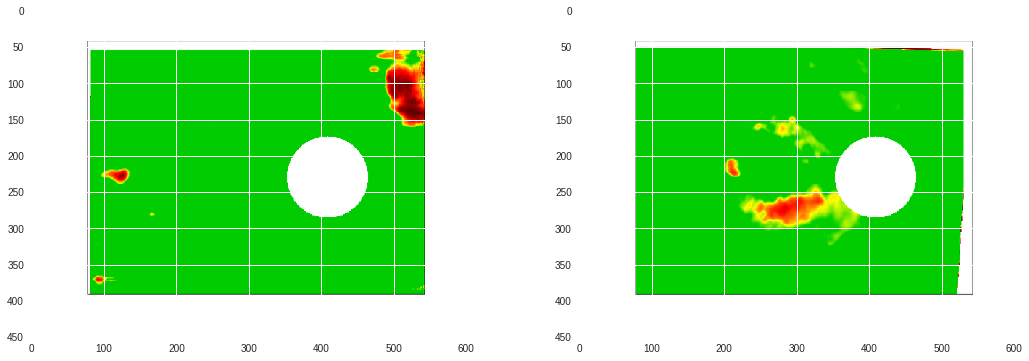

In [20]:
from vis.utils import utils
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (18, 6)


img1 = utils.load_img(test_dir + '/controls/View2098.png', target_size=(img_height, img_width))
img2 = utils.load_img(test_dir + '/patients/19105.png', target_size=(img_height, img_width))


f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

### 3 Attention heatmap displayed on the gray-scale image

### 3.1 Showing and saving FP

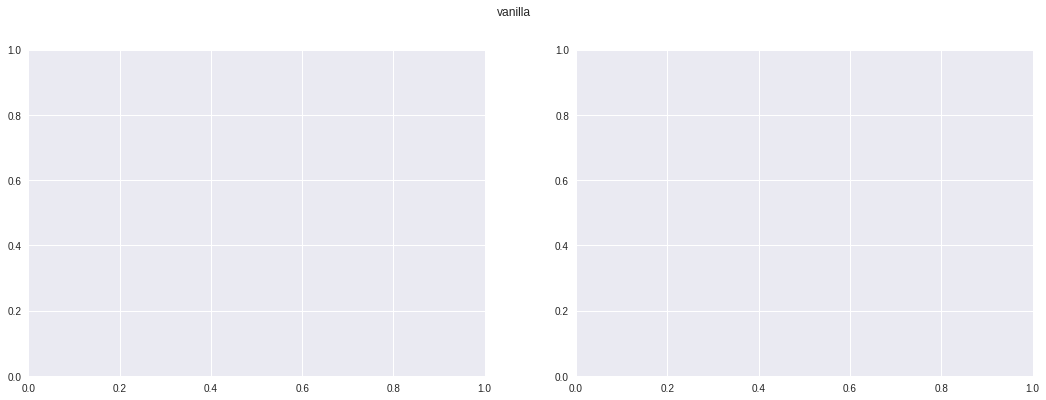

In [24]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations
from vis.visualization import visualize_cam
import matplotlib.cm as cm
from vis.utils import utils
from matplotlib import pyplot as plt

# Convert RBG to Grey-scale
def converter(x):
   #x has shape (width, height, channels)
    return (0.21 * x[:,:,:1]) + (0.72 * x[:,1:2]) + (0.07 * x[:,:,-1:])

penultimate_layer = utils.find_layer_idx(model, 'conv2d_9') #If an error occurs, find the name of layer in the model summary
layer_idx = utils.find_layer_idx(model, 'dense_6')

FPFN_dir =  "/gdrive/My Drive/deep_learning/FP&FN"

import os
FN_list = os.listdir("/gdrive/My Drive/deep_learning/FP&FN/FN")
FP_list = os.listdir("/gdrive/My Drive/deep_learning/FP&FN/FP")

FP_imglist = []
for i in range(len(FP_list)):
   FP_imglist.append(utils.load_img(FPFN_dir + '/FP/' + FP_list[i], target_size=(img_height, img_width)))

from google.colab import files

from PIL import Image



for modifier in [None]:
   plt.figure()
   f, ax = plt.subplots(1, 2)
   plt.suptitle("vanilla" if modifier is None else modifier)
   for i, img in enumerate(FP_imglist):
#         grads = visualize_saliency(model, layer_idx, filter_indices=20, seed_input=img)

#         # visualize grads as heatmap
#         ax[i].imshow(grads, cmap='jet')

       grads = visualize_cam(model, layer_idx, filter_indices=0,
                             seed_input=img, penultimate_layer_idx=penultimate_layer,
                             backprop_modifier=modifier)
       jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
       grey_img = converter(img)

       save_img = overlay(jet_heatmap, grey_img)
       im = Image.fromarray(save_img)
       im.save(str(i)+".png")
       files.download(str(i)+".png")

#         ax[i].imshow(overlay(jet_heatmap, grey_img))

### 3.2 FN

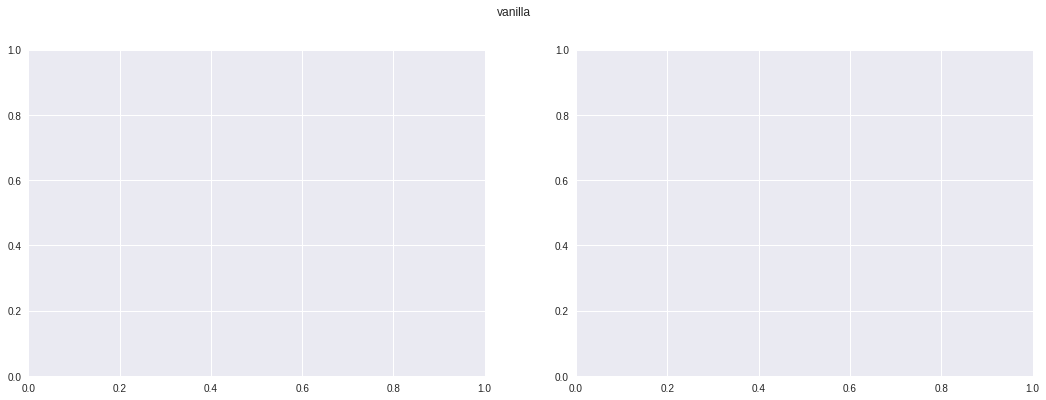

In [25]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations
from vis.visualization import visualize_cam
import matplotlib.cm as cm
from vis.utils import utils
from matplotlib import pyplot as plt

# Convert RBG to Grey-scale
def converter(x):
   #x has shape (width, height, channels)
    return (0.21 * x[:,:,:1]) + (0.72 * x[:,1:2]) + (0.07 * x[:,:,-1:])

penultimate_layer = utils.find_layer_idx(model, 'conv2d_9') #If an error occurs, find the name of layer in the model summary
layer_idx = utils.find_layer_idx(model, 'dense_6')

FPFN_dir =  "/gdrive/My Drive/deep_learning/FP&FN"

import os
FN_list = os.listdir("/gdrive/My Drive/deep_learning/FP&FN/FN")
FP_list = os.listdir("/gdrive/My Drive/deep_learning/FP&FN/FP")

FN_imglist = []
for i in range(len(FN_list)):
   FN_imglist.append(utils.load_img(FPFN_dir + '/FN/' + FN_list[i], target_size=(img_height, img_width)))

from google.colab import files

from PIL import Image



for modifier in [None]:
   plt.figure()
   f, ax = plt.subplots(1, 2)
   plt.suptitle("vanilla" if modifier is None else modifier)
   for i, img in enumerate(FN_imglist):

       grads = visualize_cam(model, layer_idx, filter_indices=0,
                             seed_input=img, penultimate_layer_idx=penultimate_layer,
                             backprop_modifier=modifier)
       jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
       grey_img = converter(img)

       save_img = overlay(jet_heatmap, grey_img)
       im = Image.fromarray(save_img)
       im.save(str(i)+".png")
       files.download(str(i)+".png")

#         ax[i].imshow(overlay(jet_heatmap, grey_img))

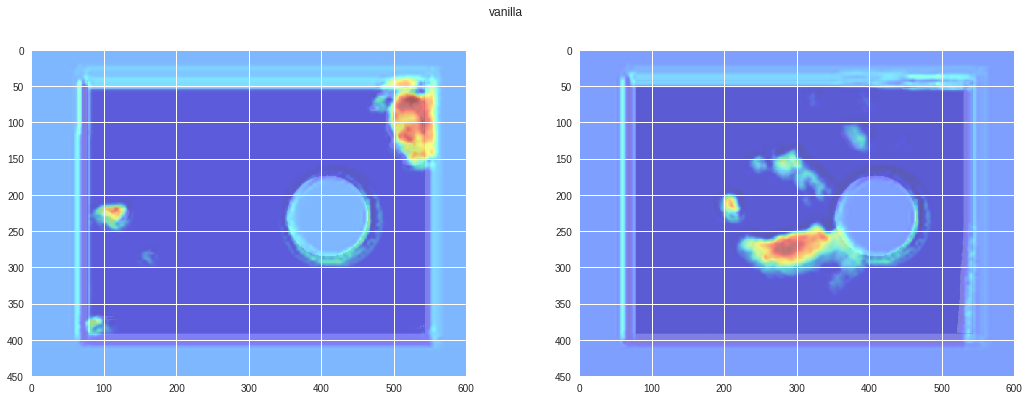

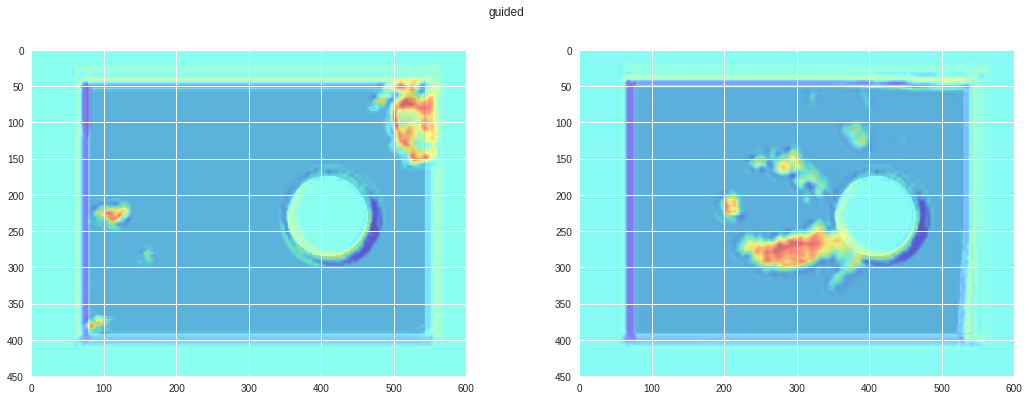

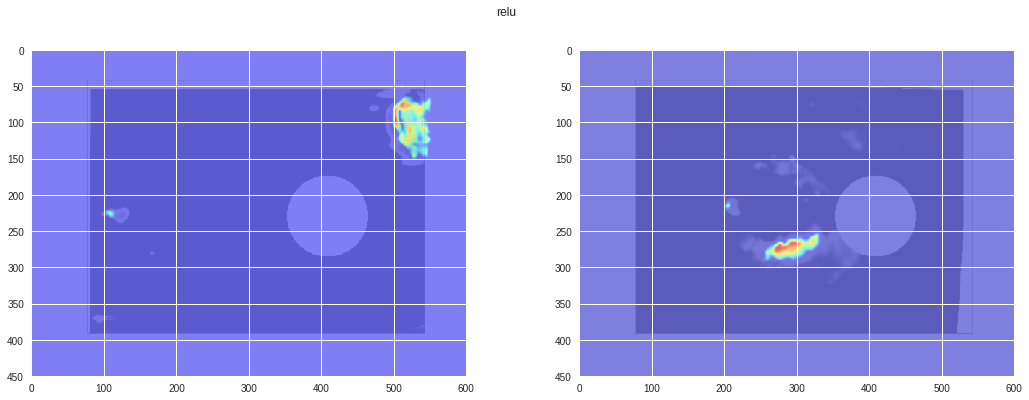

In [21]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations
from vis.visualization import visualize_cam
import matplotlib.cm as cm

# Convert RBG to Grey-scale
def converter(x):
    #x has shape (width, height, channels)
    return (0.21 * x[:,:,:1]) + (0.72 * x[:,1:2]) + (0.07 * x[:,:,-1:])

penultimate_layer = utils.find_layer_idx(model, 'conv2d_9') #If an error occurs, find the name of layer in the model summary
layer_idx = utils.find_layer_idx(model, 'dense_6')

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
        
        grads = visualize_cam(model, layer_idx, filter_indices=0, 
                              seed_input=img, penultimate_layer_idx=penultimate_layer,
                              backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        grey_img = converter(img)

        ax[i].imshow(overlay(jet_heatmap, grey_img))

### 3 Attention heatmap displayed on the origin image

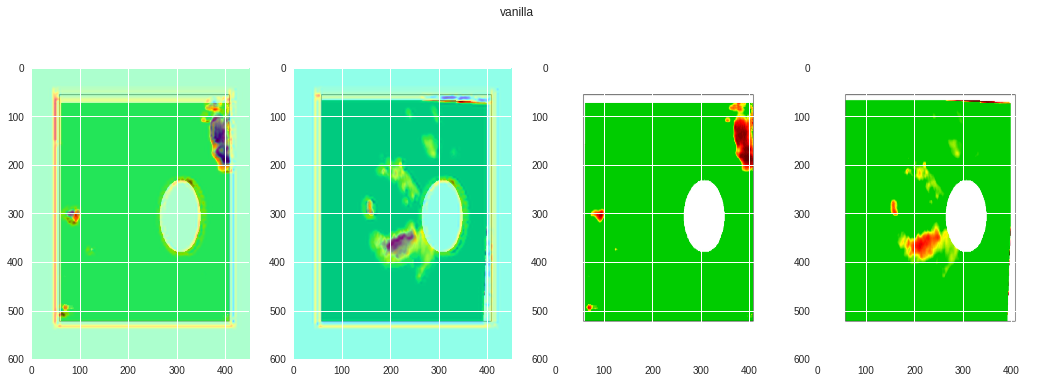

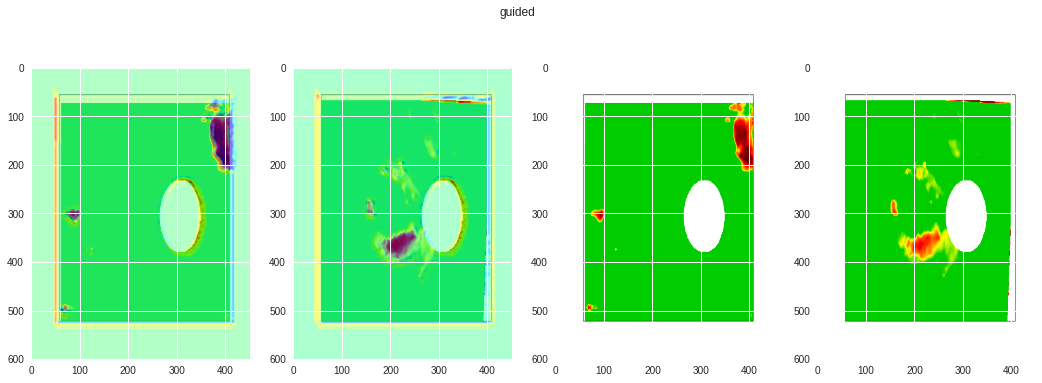

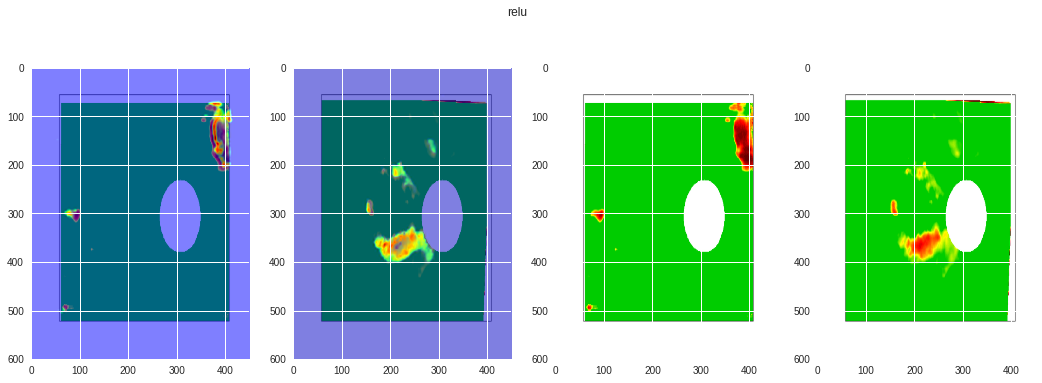

In [20]:
for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 4)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_cam(model, layer_idx, filter_indices=0, 
                              seed_input=img, penultimate_layer_idx=penultimate_layer,
                              backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))
        ax[i + 2].imshow(img)